In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nx = 32
ny = 32
delta = 1.0/nx
deltasq = delta**2

In [4]:
x, y = np.linspace(0.5*delta,1.0-0.5*delta,nx), np.linspace(0.5*delta, 1.0-0.5*delta,ny)
X, Y = np.meshgrid(x,y)

In [5]:
Source = (X-0.5)*X**2*(1-X)**2*(4-12*Y+12*Y**2) + (-1 + 12*X - 30*X**2 + 20*X**3)*Y**2*(1-Y)**2
Target = (X-0.5)*X**2*(1-X)**2*Y**2*(1-Y)**2

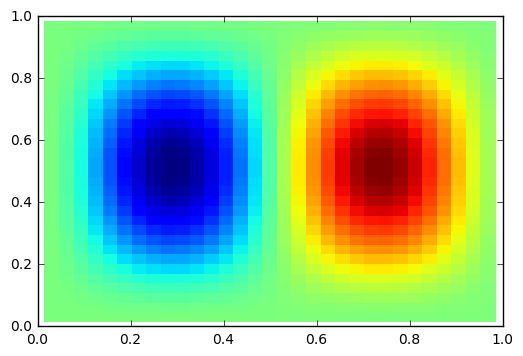

In [6]:
plt.pcolormesh(X, Y, Target)

In [7]:
LapTarget = np.empty((nx,ny))
LapTarget[1:nx-1,1:ny-1] = (Target[:nx-2,1:ny-1] + Target[2:,1:ny-1] + Target[1:nx-1,:ny-2] + Target[1:nx-1,2:] - 4*Target[1:nx-1,1:ny-1])/deltasq
LapTarget[0,1:ny-1] = (Target[0,2:] + Target[0,:ny-2] + Target[1,1:ny-1] - 3*Target[0,1:ny-1])/deltasq
LapTarget[-1,1:ny-1] = (Target[-1,2:] + Target[-1,:ny-2] + Target[-2,1:ny-1] - 3*Target[-1,1:ny-1])/deltasq
LapTarget[1:nx-1,0] = (Target[2:,0] + Target[:nx-2,0] + Target[1:nx-1,1] - 3*Target[1:nx-1,0])/deltasq
LapTarget[1:nx-1,-1] = (Target[2:,-1] + Target[:nx-2,-1] + Target[1:nx-1,-2] - 3*Target[1:nx-1,-1])/deltasq
LapTarget[0,0] = (Target[0,1] + Target[1,0] - 2*Target[0,0])/deltasq
LapTarget[-1,0] = (Target[-1,1] + Target[-2,0] - 2*Target[-1,0])/deltasq
LapTarget[0,-1] = (Target[0,-2] + Target[1,-1] - 2*Target[0,-1])/deltasq
LapTarget[-1,-1] = (Target[-1,-2] + Target[-2,-1] - 2*Target[-1,-1])/deltasq

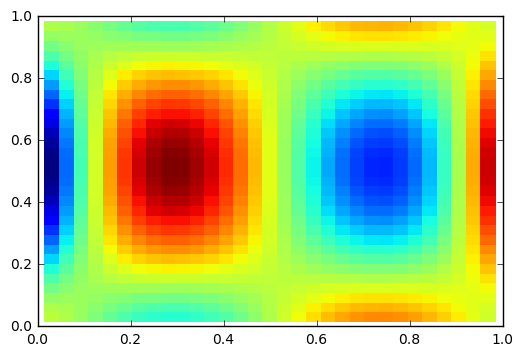

In [8]:
plt.pcolormesh(X, Y, LapTarget)

In [9]:
fourth = 0.25
third = 1.0/3.0
half = 0.5

In [10]:
error_check_interval = 100

In [11]:
last_error = float('inf')

In [14]:
P = np.zeros((nx,ny))
errors = []
not_over = True
iteration_number = 0
while not_over:
    # interior
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            P[i,j] = fourth*(P[i+1,j] + P[i-1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
    # bottom
    j = 0
    for i in range(1,nx-1):
        P[i,j] = third*(P[i+1,j] + P[i-1,j] + P[i,j+1] - deltasq*LapTarget[i,j])
    # top
    j = ny-1
    for i in range(1,nx-1):
        P[i,j] = third*(P[i+1,j] + P[i-1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
    # left
    i = 0
    for j in range(1,ny-1):
        P[i,j] = third*(P[i+1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
    # right
    i = nx-1
    for j in range(1,ny-1):
        P[i,j] = third*(P[i-1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
    # bottom left
    i=0;j=0
    P[i,j] = half*(P[i+1,j] + P[i,j+1] - deltasq*LapTarget[i,j])
    # top left
    i=0;j=ny-1
    P[i,j] = half*(P[i+1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
    # top right
    i=nx-1;ny-1
    P[i,j] = half*(P[i-1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
    # bottom right
    i=nx-1;j=0
    P[i,j] = half*(P[i-1,j] + P[i,j+1] - deltasq*LapTarget[i,j])
    
    
    iteration_number += 1
    
    if iteration_number % error_check_interval == 0:
        error = np.linalg.norm(P-Target, ord=float('inf'))
        errors.append(error)
        if np.abs(last_error - error) < 1e-6:
            not_over = False
        if iteration_number > 100000:
            not_over = False
        last_error = error

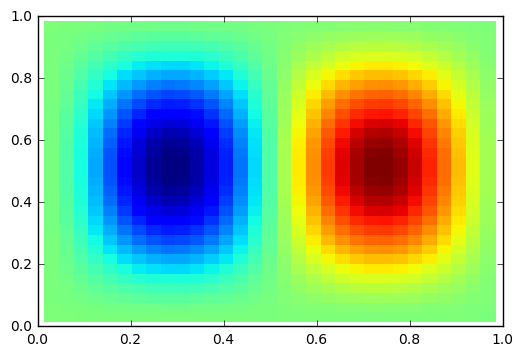

In [15]:
plt.pcolormesh(X, Y, P)

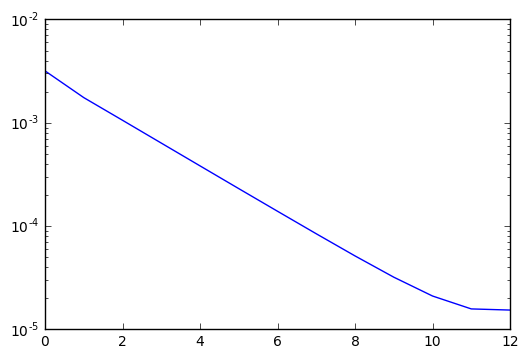

In [16]:
plt.semilogy(errors)

In [79]:
def gauss_seidel(LapTarget, P):
    not_over = True
    iteration_number = 0
    last_error = float('inf')
    while not_over:
        # interior
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                P[i,j] = fourth*(P[i+1,j] + P[i-1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
        # bottom
        j = 0
        for i in range(1,nx-1):
            P[i,j] = third*(P[i+1,j] + P[i-1,j] + P[i,j+1] - deltasq*LapTarget[i,j])
        # top
        j = ny-1
        for i in range(1,nx-1):
            P[i,j] = third*(P[i+1,j] + P[i-1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
        # left
        i = 0
        for j in range(1,ny-1):
            P[i,j] = third*(P[i+1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
        # right
        i = nx-1
        for j in range(1,ny-1):
            P[i,j] = third*(P[i-1,j] + P[i,j+1] + P[i,j-1] - deltasq*LapTarget[i,j])
        # bottom left
        i=0;j=0
        P[i,j] = half*(P[i+1,j] + P[i,j+1] - deltasq*LapTarget[i,j])
        # top left
        i=0;j=ny-1
        P[i,j] = half*(P[i+1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
        # top right
        i=nx-1;ny-1
        P[i,j] = half*(P[i-1,j] + P[i,j-1] - deltasq*LapTarget[i,j])
        # bottom right
        i=nx-1;j=0
        P[i,j] = half*(P[i-1,j] + P[i,j+1] - deltasq*LapTarget[i,j])


        iteration_number += 1

        if iteration_number % error_check_interval == 0:
            error = np.linalg.norm(P-Target, ord=float('inf'))
            if np.abs(last_error - error) < 1e-6:
                not_over = False
            if iteration_number > 100000:
                not_over = False
            last_error = error
    return P

In [18]:
nx = 32
ny = 32
dx = 1.0/nx
dy = 1.0/ny
Re = 100.0
U = 1.0
Re_d = Re*min(dx,dy)
sigma = 0.9
dt_convection = sigma/(1+2/Re_d)/(U/dx + U/dy + np.sqrt(1/dx**2+1/dy**2))
dt_transport = sigma*dx/U
dt = min(dt_convection, dt_transport)
print("Convective dt: {}\nTransport dt: {}\nChosen dt: {}".format(dt_convection, dt_transport, dt))

Convective dt: 0.005022940109224603
Transport dt: 0.028125
Chosen dt: 0.005022940109224603


In [62]:
a1 = dt/dx
a2 = dt/dy
a3 = dt/(Re*dx*dx)
xfactor = dx/dt
yfactor = dy/dt

In [96]:
global u, up, v, vp, p, u_center, u_lbc, v_center, v_lbc, u_lap, v_lap, sourceterm
u = np.zeros((nx+1,ny))
up = np.zeros((nx+1,ny))
v = np.zeros((nx,ny+1))
vp = np.zeros((nx,ny+1))
p = np.zeros((nx,ny))
u_center = np.zeros((nx,ny))
v_center = np.zeros((nx,ny))
u_lbc = np.zeros((nx+1,ny+1))
v_lbc = np.zeros((nx+1,ny+1))
u_lap = np.zeros((nx-1,ny))
v_lap = np.zeros((nx,ny-1))
sourceterm = np.zeros((nx,ny))

In [82]:
def iteration():
    global u, up, v, vp, p, u_center, u_lbc, v_center, v_lbc, sourceterm
    u_center = 0.5*(u[1:,:] + u[:-1,:])
    u_lbc[:,0] = 0.5*u[:,0]
    u_lbc[:,1:-1] = 0.5*(u[:,1:] + u[:,:-1])
    u_lbc[:,-1] = 0.5*(u[:,-1]+ U)
    
    v_center = 0.5*(v[:,1:] + v[:,:-1])
    v_lbc[0,:] = 0.5*v[0,:]
    v_lbc[1:-1,:] = 0.5*(v[1:,:] + v[:-1,:])
    v_lbc[-1,:] = 0.5*v[-1,:]
    
    u_lap = u[2:,:] + u[:-2,:] - 4*u[1:-1,:]
    u_lap[:,1:] += u[1:-1,:-1]
    u_lap[:,:-1] += u[1:-1,1:]
    u_lap[:,-1] += U
    v_lap = v[:,2:] - 4*v[:,1:-1] + v[:,:-2]
    v_lap[1:,:] += v[:-1,1:-1]
    v_lap[:-1,:] += v[1:,1:-1]

    up[1:-1,:] = u[1:-1,:] - a1*( u_center[1:,:]**2 - u_center[:-1,:]**2)+\
                  -a2*( u_lbc[1:-1,1:]*v_lbc[1:-1,1:] - u_lbc[1:-1,:-1]*v_lbc[1:-1,:-1])+\
                   a3*u_lap
    vp[:,1:-1] = v[:,1:-1] - a1*( v_lbc[1:,1:-1]*u_lbc[1:,1:-1] - v_lbc[:-1,1:-1]*u_lbc[:-1,1:-1])+\
                  -a2*( v_center[:,1:]**2 - v_center[:,:-1]**2)+\
                   a3*v_lap
            
    sourceterm = xfactor*(u[1:,:] - u[:-1,:]) + yfactor*(v[:,1:]-v[:,:-1])
    p = gauss_seidel(sourceterm, p)
    u[1:-1,:] = up[1:-1,:] - a1*(p[1:,:] - p[:-1,:])
    v[:,1:-1] = vp[:,1:-1] - a2*(p[:,1:] - p[:,:-1])

In [ ]:
for i in range(1000):
    iteration()
    if i%20==0:
        print(i)

0
20
40


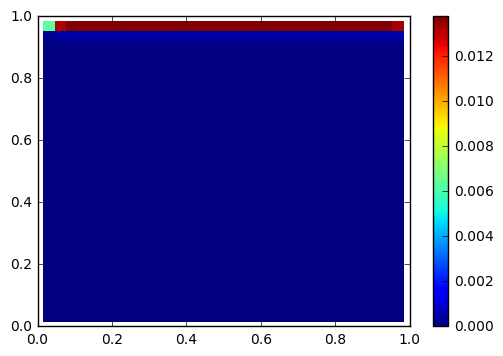

In [95]:
a = plt.pcolormesh(Y, X, u_center)
plt.colorbar(a)

In [ ]:
u_center.shape

In [ ]:
up.shape